# Coarse-grain Hetero-30mer 4YD9

Author: Sikao Guo
Modified by: Yue Moon Ying

This file includes a tutorial of how to automatically set up a coarse-grained model of a protein complex given a pdb id as an input using `ionerdss`. The model we are using is `4yd9`, which corresponds to squid hemocyanin. More information about the protein structure is available at [4YD9 on RCSB PDB](https://www.rcsb.org/structure/4YD9).

## 0. Import packages

The only required package in this example is `ionerdss`. The rest are for analysis and visualization purposes.
- `subprocess` is used to invoke PyMOL from within Python to run a .pml script that presumably generates an image.
- `os.path.*` is used to correctly expand `~` to the full path of the user's home directory and ensures you get an absolute path, not a relative one, so all file references are unambiguous. This package is called to generate and display the images output by PyMOL, within the given save directory `save_folder`.
- `IPython.display` displays images in ipython notebook

In [3]:
import ionerdss as ion
import subprocess # for running pymol
from os.path import expanduser, abspath # for expanding `~` in path
from IPython.display import display, Image # for image display in ipynb

## 1. Set the PDB ID and save directory

In [4]:
# Your PDB id
pdb_id = '4yd9'

# Make sure that pdb id is all lower case
pdb_id = pdb_id.lower()

# Set save directory
save_folder = '~/Documents/' + pdb_id + '_dir'

In [5]:
# (optional) show the thumbnail of the protein structure form RCSB PDB
# Get the image file from RCSB and display the image
image_url = f"https://cdn.rcsb.org/images/structures/{pdb_id}_assembly-1.jpeg"
display(Image(url=image_url))

## 2. Set up and create a coarse-grained model

- Initialize the pdb model given pdb id and save folder
- Set up the coarse grain model from pdb model. For all tunable parameters, see [`pdb_model.coarse_grain`](https://ionerdss.readthedocs.io/en/latest/ionerdss.nerdss_model.html#ionerdss.nerdss_model.pdb_model.PDBModel.coarse_grain)
- Identify, align, and regularize all molecular chains so that homologous chains share the same relative geometry. For all tunable parameters, see [`pdb_model.regularize_homologous_chains`](https://ionerdss.readthedocs.io/en/latest/ionerdss.nerdss_model.html#ionerdss.nerdss_model.pdb_model.PDBModel.regularize_homologous_chains)

In [6]:
# initialize the pdb model given pdb id and save folder
pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set up the coarse grain model from pdb model,
# by detecting binding interfaces between chains based on atomic distances
# for all tunable parameters see
# https://ionerdss.readthedocs.io/en/latest/ionerdss.nerdss_model.html#ionerdss.nerdss_model.pdb_model.PDBModel.coarse_grain
# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

# identify, align, and regularize all molecular chains so that homologous chains share 
# the same relative geometry. This method organizes molecule and interface objects 
# accordingly and sets up reaction objects.
# for all tunable parameters see
# https://ionerdss.readthedocs.io/en/latest/ionerdss.nerdss_model.html#ionerdss.nerdss_model.pdb_model.PDBModel.regularize_homologous_chains
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Successfully downloaded assembly file: /Users/sikao/Documents/4yd9_dir/4yd9-assembly1.cif.gz
Binding interfaces detected:
Chain A:
  Center of Mass (COM): (137.4937286376953, -120.4472885131836, 29.027103424072266)
  Interfaces: ['E', 'b', 'c']
  Interface Coordinates: 
    (145.06109619140625, -99.87287902832031, -9.5646333694458)
    Interface Energy: -56.07
    (183.09378051757812, -111.4195556640625, 28.47572135925293)
    Interface Energy: 4.90
    (123.35087585449219, -134.14637756347656, 96.72075653076172)
    Interface Energy: -3.53
Chain B:
  Center of Mass (COM): (205.2166290283203, -57.25521469116211, -37.30060958862305)
  Interfaces: ['D', 'E', 'b']
  Interface Coordinates: 
    (223.3084716796875, -40.250308990478516, -36.79279708862305)
    Interface Energy: -54.41
    (185.0152130126953, -70.97486114501953, -33.80522155761719)
    Interface Energy: -10.75
    (236.0802001953125, -81.6719970703125, -29.209197998046875)
    Interface Energy: -9.64
Chain C:
  Center of Mass

## 3. (Optional) Call PyMOL script to visualize the coarse-grained model

- *REQUIRES*: PyMOL
- Note: if PyMOL is installed but you are still getting `FileNotFoundError: [Errno 2] No such file or directory: 'pymol'`, this means that Python can't find the `pymol` executable in your system's `PATH` (you can confirm this with `which pymol` in terminal). This problem might come from installing PyMOL through Anaconda (`conda install -c schrodinger pymol`) and then the pymol binary might only be available inside the conda environment.
- If you do not want to install it outside the conda environment, you can fix it by using the full path via replacing `"pymol"` in `subprocess.run` with the full path (e.g. `/Users/username/miniconda3/envs/myenv/bin/pymol`)

PyMOL>load /Users/sikao/Documents/4yd9_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/4yd9_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 30 atoms.
PyMOL>color blue, name INT
 Executive: Colored 88 atoms.
PyMOL>pseudoatom com_A, pos=[137.494, -120.447, 29.027], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[145.061, -99.873, -9.565], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, 

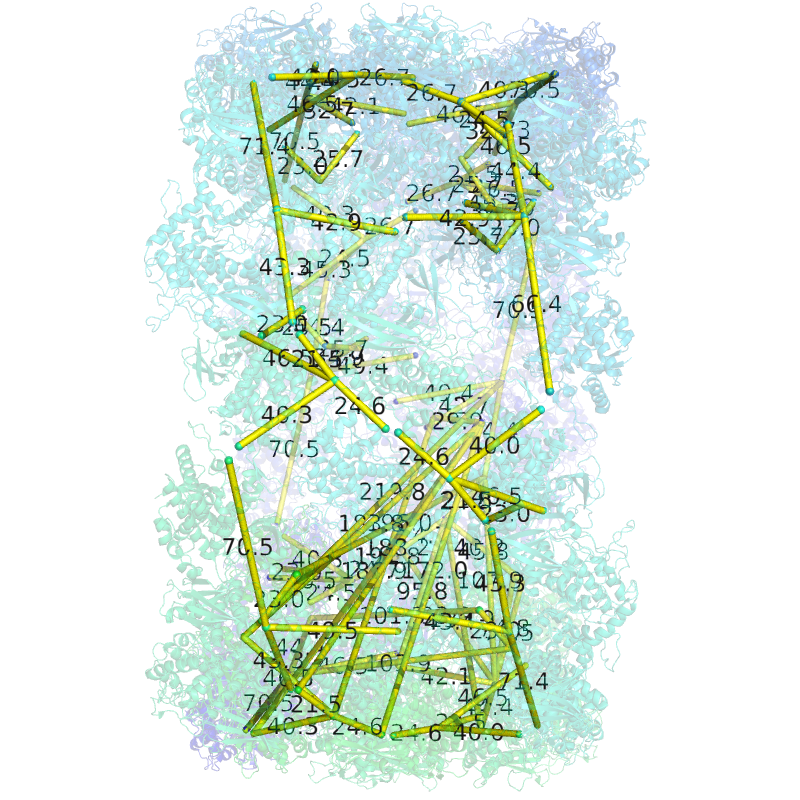

In [7]:
# Get the absolute save directory path
if save_folder.startswith('~'):
    abs_save_folder = expanduser(save_folder)
abs_save_folder = abspath(abs_save_folder)

# Call the PyMOL script to draw the image for the coarse-grained model
subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)

# Display the coarse-grained image
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))